## face_recognitionライブラリを試す

In [1]:
import face_recognition
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
image = face_recognition.load_image_file('../data/obama2.jpg')

In [3]:
image.dtype

dtype('uint8')

In [4]:
type(image)

numpy.ndarray

In [5]:
#  oprncvでも見込んだものは下のコマンドで変更が必要だが，このライブラリで読み込んだのは変換の必要なし
# show_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

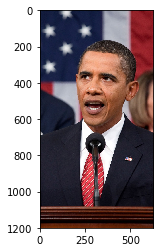

In [6]:
plt.imshow(image)
plt.show()

In [7]:
face_landmarks_list = face_recognition.face_landmarks(image)

In [8]:
face_landmarks_list

[{'bottom_lip': [(353, 529),
   (333, 557),
   (306, 571),
   (286, 572),
   (269, 568),
   (252, 552),
   (243, 523),
   (251, 523),
   (272, 544),
   (288, 548),
   (306, 548),
   (344, 528)],
  'chin': [(210, 382),
   (206, 416),
   (207, 452),
   (209, 489),
   (213, 526),
   (222, 564),
   (236, 598),
   (254, 625),
   (286, 638),
   (325, 635),
   (363, 618),
   (399, 595),
   (430, 566),
   (452, 530),
   (467, 491),
   (478, 449),
   (486, 407)],
  'left_eye': [(232, 373),
   (243, 361),
   (261, 362),
   (276, 377),
   (259, 379),
   (242, 379)],
  'left_eyebrow': [(213, 358), (224, 339), (245, 335), (268, 338), (289, 347)],
  'nose_bridge': [(299, 376), (293, 397), (287, 418), (281, 440)],
  'nose_tip': [(260, 460), (272, 465), (285, 469), (304, 466), (322, 464)],
  'right_eye': [(345, 384),
   (359, 370),
   (379, 374),
   (396, 389),
   (378, 391),
   (359, 388)],
  'right_eyebrow': [(322, 350),
   (352, 345),
   (383, 348),
   (411, 360),
   (431, 382)],
  'top_lip': [(243

In [9]:
lips = np.array([[pos[0], pos[1]] for pos in face_landmarks_list[0]['bottom_lip']])
lips[:, 0]

array([353, 333, 306, 286, 269, 252, 243, 251, 272, 288, 306, 344])

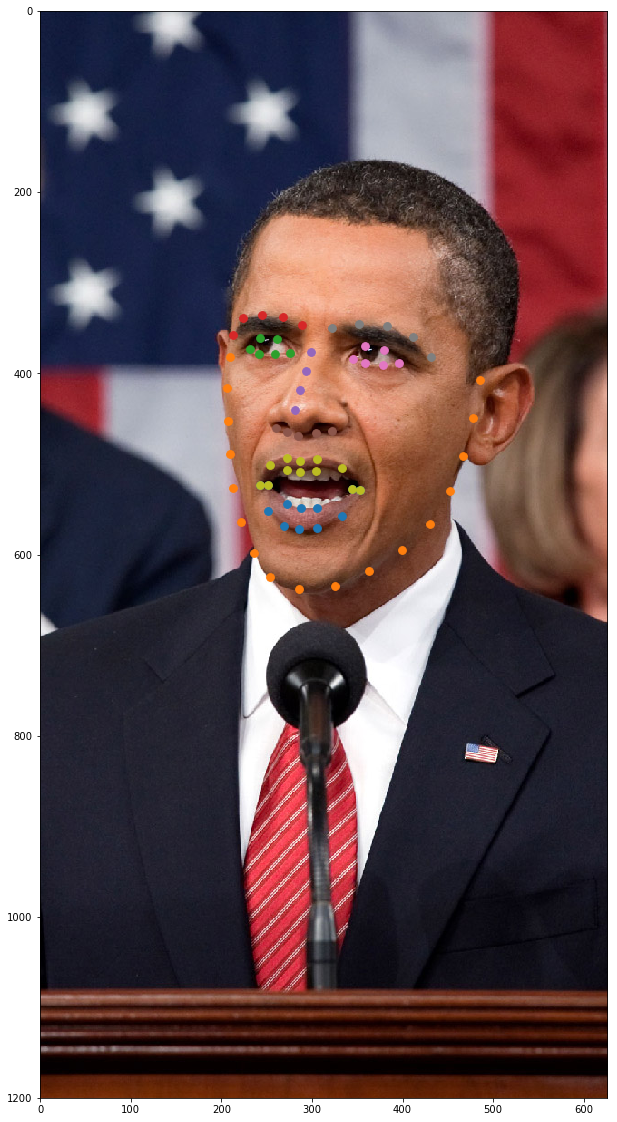

In [15]:
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111)
ax.imshow(image)
for parts_name in ['bottom_lip', 'chin', 'left_eye', 'left_eyebrow', 'nose_bridge', 'nose_tip', 'right_eye', 'right_eyebrow', 'top_lip']:
    parts = np.array([[pos[0], pos[1]] for pos in face_landmarks_list[0][parts_name]])
    ax.scatter(parts[:, 0], parts[:, 1], s=60)
plt.savefig('../data/output_obama2_parts.jpg')
plt.show()

In [11]:
def eye_point(img, parts):
    points = np.array([[point[0], point[1]] for point in parts])
    x_min, x_max = points[:, 0].min(), points[:, 0].max()
    y_min, y_max = points[:, 1].min(), points[:, 1].max()
    eye = img[y_min:y_max, x_min:x_max]
    _, eye = cv2.threshold(cv2.cvtColor(eye, cv2.COLOR_RGB2GRAY), 30, 255, cv2.THRESH_BINARY_INV)
    center = get_center(eye)
    if is_close(y_min, y_max):
        return None

    if center:
        return center[0] + x_min, center[1] + y_min
    return center

In [12]:
def get_center(gray_img):
    moments = cv2.moments(gray_img, False)
    try:
        return int(moments['m10'] / moments['m00']), int(moments['m01'] / moments['m00'])
    except:
        return None

In [13]:
def is_close(y0, y1):
    if abs(y0 - y1) < 3:
        return True
    return False

In [14]:
eye_center = eye_point(image, face_landmarks_list[0]['left_eye'])
eye_center

(245, 365)